# Cross validation

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold

In [3]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, random_state=42)

In [4]:
X=(X*100).round(2)
X

array([[ -99.91,  -66.39],
       [ 124.67,  115.36],
       [  96.28,   85.94],
       ...,
       [ -10.13, -159.02],
       [  64.38,  -78.05],
       [  69.85, -127.94]])

In [5]:
kfold=KFold(10, shuffle=True, random_state=42)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
model=KNeighborsClassifier()

In [8]:
list_of_accuracies=[]

In [10]:
from sklearn.metrics import accuracy_score

for train, test in kfold.split(X):
    print('train are:', X[train])
    print('test are:', X[test])
    model.fit(X[train], y[train])
    list_of_accuracies.append(accuracy_score(y[test], model.predict(X[test])))

train are: [[ -99.91  -66.39]
 [ 124.67  115.36]
 [  96.28   85.94]
 ...
 [ 102.04  116.46]
 [ -10.13 -159.02]
 [  69.85 -127.94]]
test are: [[  52.11   66.4 ]
 [ 277.21  -56.04]
 [ -90.63  -91.98]
 [  14.5    55.87]
 [-124.89 -214.95]
 [ -90.93  -75.94]
 [-137.72   92.39]
 [ 193.12  -85.61]
 [ -81.41  -98.76]
 [ 201.86  194.4 ]
 [ 209.26 -147.84]
 [ 122.43  -91.17]
 [ 211.06 -100.58]
 [-113.67 -173.2 ]
 [  22.36   35.02]
 [ -45.36   76.31]
 [ -49.77  227.72]
 [-160.77  157.  ]
 [  57.53   58.7 ]
 [-202.66  206.7 ]
 [  25.95    8.1 ]
 [ -97.72  -47.68]
 [-231.35  341.94]
 [ 172.88  -82.34]
 [-150.38 -241.77]
 [  17.59   34.86]
 [ 144.35 -127.24]
 [ 132.56  133.36]
 [  19.15   25.18]
 [  96.09 -122.37]
 [-158.15  177.29]
 [-109.11  -56.64]
 [  -4.08  -47.96]
 [ 178.86  -99.02]
 [ -57.27  -75.49]
 [ 122.83  -75.45]
 [ 212.31  184.98]
 [-129.78 -140.78]
 [ 344.55 -131.29]
 [  76.65   72.74]
 [ -55.53  180.38]
 [ -25.46   78.25]
 [  65.74 -112.83]
 [-114.97 -132.6 ]
 [  23.93   41.23]
 [ 1

In [11]:
list_of_accuracies

[0.92, 0.96, 0.91, 0.94, 0.89, 0.93, 0.91, 0.91, 0.92, 0.89]

Main types of Cross Validation:
1. Train/Test split
2. LOOCV - Leave one out cross validation
3. Stratify - same as stratified train test split but cross validation
4. Repeated
5. Repeated Stratified
6. etc.

# Hyperparameter tuning

## Classification case

In [12]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [13]:
?KNeighborsClassifier

In [18]:
params={'n_neighbors':range(3,10,2), #4 models
    'weights':['uniform','distance'], #2 models
    'leaf_size':[30,45], #2 models
    'p':[1,2,3]} #3 models

In [16]:
# 48 models in all

In [19]:
model=KNeighborsClassifier(n_jobs=-1)
grid=GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, scoring='accuracy')

In [21]:
grid

GridSearchCV(estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'leaf_size': [30, 45], 'n_neighbors': range(3, 10, 2),
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [22]:
grid_result=grid.fit(X,y)

In [39]:
print('Best model has', grid_result.best_score_, 'accuracy using', grid_result.best_params_)

Best model has 0.922 accuracy using {'leaf_size': 30, 'n_neighbors': 5, 'p': 3, 'weights': 'uniform'}


## Regression case

In [27]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [25]:
X,y= make_regression(n_samples=1000, n_features=10, n_informative=6, noise=0.06)

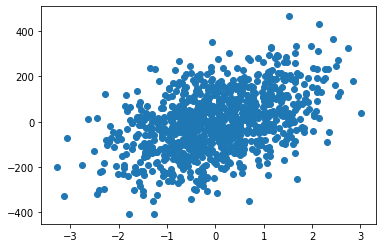

In [29]:
plt.scatter(X[:,1], y)

In [30]:
from sklearn.linear_model import Ridge
from scipy.stats import uniform

In [32]:
uniform().rvs(100)

array([0.35198379, 0.45512485, 0.74492178, 0.65698658, 0.14433714,
       0.21264098, 0.00323298, 0.6082184 , 0.71519847, 0.13645545,
       0.40337549, 0.44340438, 0.52286726, 0.35246441, 0.54192601,
       0.93669981, 0.33645341, 0.91106812, 0.06796367, 0.02470795,
       0.11234   , 0.57866754, 0.32892145, 0.5459307 , 0.84904454,
       0.52547566, 0.44428306, 0.77364543, 0.93673325, 0.11618289,
       0.11368429, 0.02866932, 0.0494632 , 0.80395029, 0.30817288,
       0.51614833, 0.81705831, 0.05643457, 0.73542247, 0.41587181,
       0.82909986, 0.37400156, 0.06003682, 0.86862592, 0.8798496 ,
       0.7293121 , 0.65816695, 0.29571311, 0.33275071, 0.99896933,
       0.07447572, 0.51376244, 0.79859654, 0.71141731, 0.70053588,
       0.94904882, 0.11237028, 0.16642287, 0.98599143, 0.76171844,
       0.26628239, 0.66059836, 0.10152909, 0.31378616, 0.45884703,
       0.94570481, 0.86771298, 0.84740691, 0.3277968 , 0.1426727 ,
       0.26862139, 0.69972436, 0.67475563, 0.97261083, 0.94542

In [33]:
?Ridge

In [34]:
params={'alpha':uniform()}

In [35]:
model=Ridge()

In [36]:
rsearch=RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=100)

In [37]:
rsearch.fit(X,y)

RandomizedSearchCV(estimator=Ridge(), n_iter=100,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1243d7160>})

In [38]:
print('Best model has', rsearch.best_score_, 'accuracy using', rsearch.best_params_)

Best model has 0.999979818157237 accuracy using {'alpha': 0.0021013852295024282}


# Hyperparameter Tuning + Cross validation

In [40]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [41]:
X,y= make_classification(n_samples=1000, n_features=15, n_redundant=4, random_state=11)

In [42]:
params={'n_neighbors':range(3,10,2), #4 models
    'weights':['uniform','distance'], #2 models
    'leaf_size':[30,45], #2 models
    'p':[1,2,3]} #3 models

In [43]:
model=KNeighborsClassifier(n_jobs=-1)

cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

grid_search=GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, scoring='accuracy', cv=cv)

In [44]:
grid_results=grid_search.fit(X,y)

In [45]:
grid_results

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=42),
             estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'leaf_size': [30, 45], 'n_neighbors': range(3, 10, 2),
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [46]:
grid_results.best_score_

0.9293333333333333

In [47]:
grid_results.best_estimator_

KNeighborsClassifier(n_jobs=-1, n_neighbors=9, p=1)

In [48]:
means=grid_results.cv_results_['mean_test_score']
stds=grid_results.cv_results_['std_test_score']
params=grid_results.cv_results_['params']

In [49]:
for mean, std, param in zip(means,stds,params):
    print(f'{mean}, {std} with {param}\n')

0.9213333333333331, 0.025263060428661867 with {'leaf_size': 30, 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}

0.9213333333333331, 0.025263060428661867 with {'leaf_size': 30, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

0.8876666666666666, 0.028830924754891633 with {'leaf_size': 30, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}

0.8876666666666666, 0.028830924754891633 with {'leaf_size': 30, 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}

0.8856666666666667, 0.02666874991862616 with {'leaf_size': 30, 'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}

0.8856666666666667, 0.02666874991862616 with {'leaf_size': 30, 'n_neighbors': 3, 'p': 3, 'weights': 'distance'}

0.9256666666666667, 0.025124136248281675 with {'leaf_size': 30, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

0.9250000000000002, 0.025916532689900195 with {'leaf_size': 30, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

0.908, 0.02548201980482186 with {'leaf_size': 30, 'n_neighbors': 5, 'p': 2, 'weights': 'unifor

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, grid_results.predict(X))

array([[458,  42],
       [ 18, 482]])

# Final Workflow

1. Get the data - from data warehouse, website, api, etc.
2. Train Test split. Dont touch the test until step 7
2. Data Preprocessing
3. Split the clean dataset again into train/validation datasets. Crossvalidation counts
4. Train the model with train dataset and test it with validation dataset. Track the quality improvement
5. Calculate the quality on the train dataset and validation datasets
6. If the quality of the validation dataset is almost the same as train one - go to the step 8. Else - try improving the model
7. Test the pipeline (cleaning - preprocessing - modelling) on the test dataset from step 2. If the quality of your model is somewhere around the step 6 - profit!. Else - desole...


# Imbalance

In [51]:
from sklearn.datasets import make_classification
import numpy as np

In [52]:
from collections import Counter

In [53]:
pip install imblearn

     |████████████████████████████████| 167 kB 5.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [54]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [56]:
X,y= make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], random_state=11)

In [57]:
counter=Counter(y)

In [58]:
counter

Counter({0: 987, 1: 13})

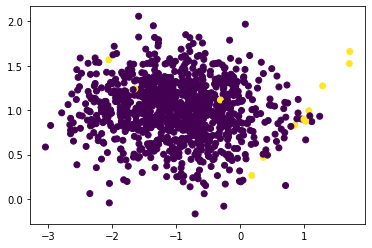

In [59]:
plt.scatter(X[:,0], X[:,1], c=y, label=str(y))
plt.show()

# Oversample

In [60]:
over=SMOTE()
X,y=over.fit_resample(X,y)

Counter({0: 987, 1: 987})


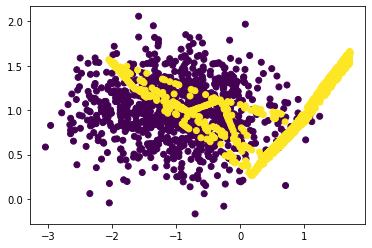

In [61]:
counter=Counter(y)
print(counter)

plt.scatter(X[:,0], X[:,1], c=y, label=str(y))
plt.show()

Counter({0: 987, 1: 13})


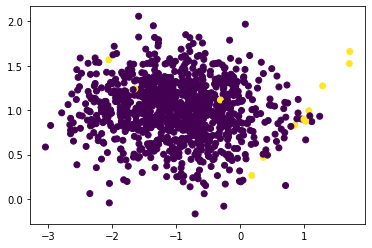

In [62]:
X,y= make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], random_state=11)

#over=SMOTE()
#X,y=over.fit_resample(X,y)

counter=Counter(y)
print(counter)

plt.scatter(X[:,0], X[:,1], c=y, label=str(y))
plt.show()

Counter({0: 987, 1: 98})


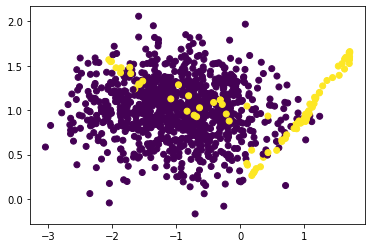

In [63]:
X,y= make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], random_state=11)

over=SMOTE(sampling_strategy=0.1)
X,y=over.fit_resample(X,y)

counter=Counter(y)
print(counter)

plt.scatter(X[:,0], X[:,1], c=y, label=str(y))
plt.show()

Counter({0: 394, 1: 197})


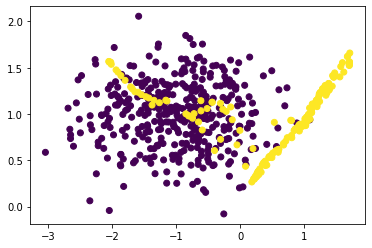

In [69]:
X,y= make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], random_state=11)

over=SMOTE(sampling_strategy=0.2)
under=RandomUnderSampler(sampling_strategy=0.5)

steps=[('o',over), ('u',under)]
pipe=Pipeline(steps=steps)

X,y=pipe.fit_resample(X,y)

counter=Counter(y)
print(counter)

plt.scatter(X[:,0], X[:,1], c=y, label=str(y))
plt.show()

In [70]:
from imblearn.over_sampling import BorderlineSMOTE

Counter({0: 394, 1: 197})


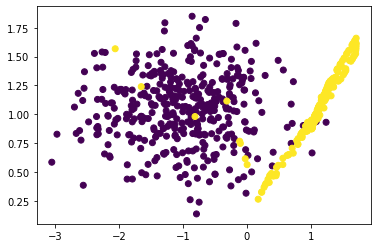

In [155]:
X,y= make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], random_state=11)

over=BorderlineSMOTE(sampling_strategy=0.2)
under=RandomUnderSampler(sampling_strategy=0.5)

steps=[('o',over), ('u',under)]
pipe=Pipeline(steps=steps)

X,y=pipe.fit_resample(X,y)

counter=Counter(y)
print(counter)

plt.scatter(X[:,0], X[:,1], c=y, label=str(y))
plt.show()

# Classification model

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
from sklearn.model_selection import cross_val_score

In [80]:
from sklearn.model_selection import RepeatedStratifiedKFold

Build a baseline model that I will use as a benchmark to see the increase or decrease in performance after using over and undersampling techniques

In [81]:
model=DecisionTreeClassifier()
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [82]:
X,y= make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], random_state=11)

scores=cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)

In [83]:
print('Mean recall is', np.mean(scores))

Mean recall is 0.36666666666666664


**Building model #1**

In [85]:
over=SMOTE()
steps=[('o', over),('model', model)]
pipe=Pipeline(steps=steps)

scores=cross_val_score(pipe, X, y, scoring='recall', cv=cv, n_jobs=-1)

print('Mean recall is', np.mean(scores))

Mean recall is 0.6166666666666667


**Building model #2**

In [87]:
X,y= make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], random_state=11)

over=BorderlineSMOTE(sampling_strategy=0.2)
under=RandomUnderSampler(sampling_strategy=0.5)

steps=[('o',over), ('u',under),('model', model)]
pipe=Pipeline(steps=steps)

scores=cross_val_score(pipe, X, y, scoring='recall', cv=cv, n_jobs=-1)

print('Mean recall is', np.mean(scores))


Mean recall is 0.5833333333333334


I need to validate my model. In order to do so, we need to split our dataset into train/test before we built our model

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=11)

In [90]:
over=BorderlineSMOTE(sampling_strategy=0.1)
under=RandomUnderSampler(sampling_strategy=0.5)
model=DecisionTreeClassifier()

steps=[('o',over), ('u',under),('model', model)]
pipe=Pipeline(steps=steps)
cv=RepeatedStratifiedKFold(n_splits=7, n_repeats=3, random_state=1)

scores=cross_val_score(pipe, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1)
print('Mean recall is', np.mean(scores))

Mean recall is 0.47619047619047616


In [91]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('o', BorderlineSMOTE(sampling_strategy=0.1)),
                ('u', RandomUnderSampler(sampling_strategy=0.5)),
                ('model', DecisionTreeClassifier())])

In [92]:
pipe.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [93]:
from sklearn.metrics import recall_score, confusion_matrix

In [94]:
recall_score(y_test, pipe.predict(X_test))

0.6666666666666666

In [95]:
confusion_matrix(y_test, pipe.predict(X_test))

array([[231,  16],
       [  1,   2]])

# More complex case

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [97]:
X,y = make_classification(n_classes=2, n_informative=4, n_redundant=2,n_features=10, n_clusters_per_class=1, n_samples=1000, weights=[0.9,0.1], random_state=11)

In [99]:
counter=Counter(y)
counter

Counter({0: 895, 1: 105})

In [100]:
pca=PCA(0.85)
over=BorderlineSMOTE(sampling_strategy=0.2)
under=RandomUnderSampler(sampling_strategy=0.4)

model=KNeighborsClassifier()

pipe=Pipeline([('o',over),('u',under),('pca',pca),('model',model)])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=11)

Build a baseline model

In [114]:
baseline=KNeighborsClassifier()

baseline.fit(X_train, y_train)

recall_score(y_test, baseline.predict(X_test))

0.8461538461538461

In [115]:
confusion_matrix(y_test, baseline.predict(X_test))

array([[224,   0],
       [  4,  22]])

Testing our pipe

In [116]:
pipe.fit(X_train, y_train)

y_pred=pipe.predict(X_test)

In [117]:
recall_score(y_test, pipe.predict(X_test))

0.7692307692307693

In [118]:
confusion_matrix(y_test, pipe.predict(X_test))

array([[224,   0],
       [  6,  20]])

# Really complex case (test)

In [119]:
Counter(y)

Counter({0: 895, 1: 105})

In [120]:
X.shape

(1000, 10)

In [139]:
model=KNeighborsClassifier(n_jobs=-1)
over=BorderlineSMOTE(sampling_strategy=0.2, k_neighbors=6)
under=RandomUnderSampler(sampling_strategy=0.5)
pca=PCA()


In [140]:
params={'n_neighbors':range(3,10,2),
    'weights':['uniform','distance'],
    'leaf_size':[30,45],
    'p':[1,2,3]}

In [141]:
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

In [142]:
from sklearn.model_selection import GridSearchCV

In [143]:
grid_search=GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, scoring='recall', cv=cv)

In [144]:
pipe=Pipeline([('o',over),('u',under),('pca',pca),('model',grid_search)])

In [145]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('o', BorderlineSMOTE(k_neighbors=6, sampling_strategy=0.2)),
                ('u', RandomUnderSampler(sampling_strategy=0.5)),
                ('pca', PCA()),
                ('model',
                 GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=42),
                              estimator=KNeighborsClassifier(n_jobs=-1),
                              n_jobs=-1,
                              param_grid={'leaf_size': [30, 45],
                                          'n_neighbors': range(3, 10, 2),
                                          'p': [1, 2, 3],
                                          'weights': ['uniform', 'distance']},
                              scoring='recall'))])

In [146]:
pipe['model'].best_score_

0.9774725274725274

In [147]:
pipe['model'].best_params_

{'leaf_size': 30, 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}

In [148]:
pipe['pca'].explained_variance_ratio_.round(2)

array([0.52, 0.12, 0.08, 0.07, 0.06, 0.06, 0.05, 0.04, 0.  , 0.  ])

In [149]:
import pickle

In [150]:
pickle.dump(pipe, open('mymodel.sav','wb'))

In [153]:
np.savetxt('X_test.csv', X_test, delimiter=',')
np.savetxt('y_test.csv', y_test, delimiter=',')